In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.pipeline import  Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Import the train dataset 

train_df = pd.read_csv(r"C:\Users\HP\Desktop\my projects\SENTIMENT ANALYSIS WITH NLP\DATASET\train.txt", header = None)

In [4]:
train_df.head(20)

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger
5,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...
9,i feel romantic too;love


In [5]:
# Import the validation dataset 

val_df = pd.read_csv(r"C:\Users\HP\Desktop\my projects\SENTIMENT ANALYSIS WITH NLP\DATASET\val.txt", header = None)

In [6]:
val_df.head(20)

,0
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant;love
3,i am just feeling cranky and blue;anger
4,i can have for a treat or if i am feeling fest...
5,i start to feel more appreciative of what god ...
6,i am feeling more confident that we will be ab...
7,i feel incredibly lucky just to be able to tal...
8,i feel less keen about the army every day;joy
9,i feel dirty and ashamed for saying that;sadness


In [7]:
# Import the test dataset 
test_df = pd.read_csv(r"C:\Users\HP\Desktop\my projects\SENTIMENT ANALYSIS WITH NLP\DATASET\test.txt", header = None)

In [8]:
test_df.head(20)

,0
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty;sadness
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this on...
5,i cant walk into a shop anywhere where i do no...
6,i felt anger when at the end of a telephone ca...
7,i explain why i clung to a relationship with a...
8,i like to have the same breathless feeling as ...
9,i jest i feel grumpy tired and pre menstrual w...


In [9]:
def split_data(df):
    df[['text', 'sentiment']] = df[0].str.split(';', expand=True)
    return df[['text', 'sentiment']] 

In [10]:
train = split_data(train_df)
val = split_data(val_df)
test = split_data(test_df)

In [11]:
train.head(20)

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


<Axes: xlabel='sentiment', ylabel='count'>

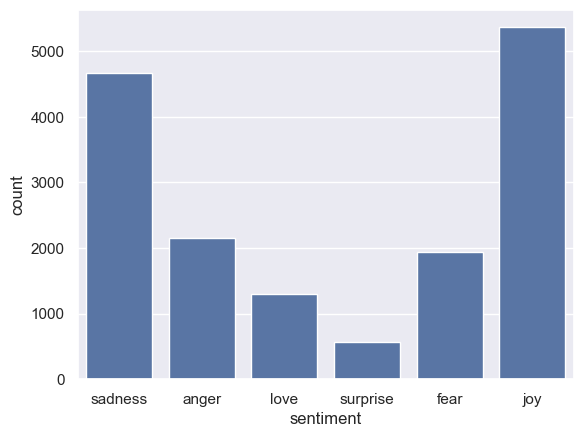

In [12]:
sns.countplot(data = train, x='sentiment') 

<Axes: xlabel='sentiment', ylabel='count'>

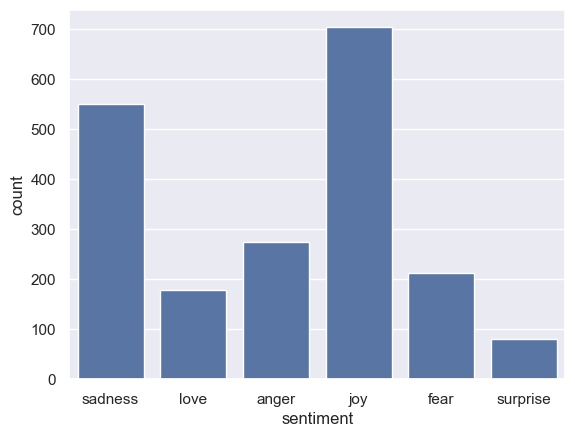

In [13]:
sns.countplot(data = val, x='sentiment') 

<Axes: xlabel='sentiment', ylabel='count'>

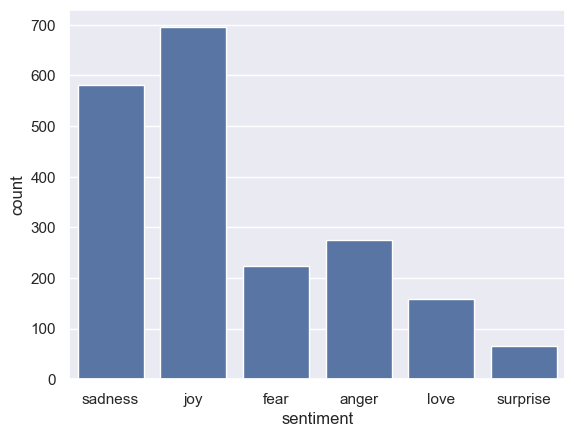

In [14]:
sns.countplot(data = test, x='sentiment') 

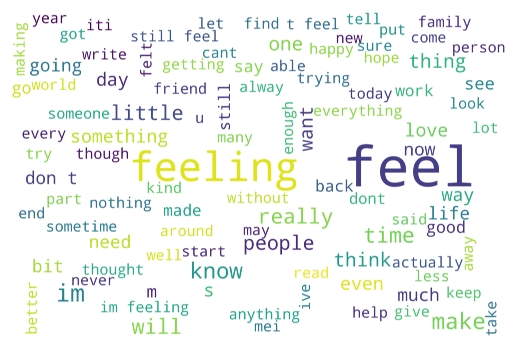

In [15]:
word_cloud_text = ''.join(train['text'])

wordcloud = WordCloud(max_font_size=100, 
                      max_words=100, 
                      background_color="white", 
                      scale = 10,
                      width=900, 
                      height=600 
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

## preprocessing

 ## Converting words to lower/upper case

In [18]:
train['text_lower'] = train['text'].str.lower()

In [19]:
from nltk import word_tokenize

# Word tokenization
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in train['text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in train['text_lower']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  15210
Number of unique tokens now:  15210


## Removing special characters

In [21]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = train['text_lower'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

set()

# Removing stopwords

In [23]:
print('Available languages for NLTK v.3.4.5: ')
print(stopwords.words('english'))

Available languages for NLTK v.3.4.5: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

In [24]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]
    
stop_words = set(stopwords.words('english'))

train['text_nonstop'] = train['text_lower'].apply(lambda row: stopwords_removal(stop_words, row))
train[['text_lower','text_nonstop']].head(20)

,text_lower,text_nonstop
0,i didnt feel humiliated,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,"[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,"[ive, feeling, little, burdened, lately, wasnt..."
6,ive been taking or milligrams or times recomme...,"[ive, taking, milligrams, times, recommended, ..."
7,i feel as confused about life as a teenager or...,"[feel, confused, life, teenager, jaded, year, ..."
8,i have been with petronas for years i feel tha...,"[petronas, years, feel, petronas, performed, w..."
9,i feel romantic too,"[feel, romantic]"


### LEMMATIZING THE DATA

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('wordnet')

In [27]:
lemmatizer = WordNetLemmatizer()
def lemmatize_terms(row):
    return [lemmatizer.lemmatize(term) for term in row]

In [28]:
train['text_lemm'] = train['text_nonstop'].apply(lambda row: lemmatize_terms(row))
train['text_lemm'].head()

0                            [didnt, feel, humiliated]
1    [go, feeling, hopeless, damned, hopeful, aroun...
2    [im, grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, fireplace, know, st...
4                                   [feeling, grouchy]
Name: text_lemm, dtype: object

In [30]:
cv = CountVectorizer(ngram_range=(1,1))

#### CREATING A CUSTOM TRANFORMER TO CARRY OUT ALL THE PREPROCESSED STEPS FOR DATA TRANSFORMATION

In [32]:
class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower=True, remove_special_chars=True, remove_stopwords=True, lemmatize=True):
        self.lower = lower
        self.remove_special_chars = remove_special_chars
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.process_text(text) for text in X]

    def process_text(self, text):
        if self.lower:
            text = text.lower()
        
        if self.remove_special_chars:
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
        
        words = nltk.word_tokenize(text)  # Tokenize the text

        if self.remove_stopwords:
            words = [word for word in words if word not in self.stop_words]
        
        if self.lemmatize:
            words = [self.lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)

In [33]:
text_processor = TextProcessor()

### RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier


pipeline_rfc = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer(max_features=10000, ngram_range=(1, 1))),  
    ("model", RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, verbose=1)) 
])

# Fit the pipeline to the training data
pipeline_rfc.fit(train['text'], train['sentiment'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Pipeline(steps=[('text_processing', TextProcessor()),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('model',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42, verbose=1))])

### EVALUATING THE MODEL WITH THE VALIDATION DARASET

In [37]:
pred_rfc = pipeline_rfc.predict(val['text'])
print(classification_report(val['sentiment'],pred_rfc))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


              precision    recall  f1-score   support

       anger       0.88      0.89      0.88       275
        fear       0.83      0.86      0.85       212
         joy       0.92      0.92      0.92       704
        love       0.85      0.80      0.82       178
     sadness       0.92      0.92      0.92       550
    surprise       0.84      0.80      0.82        81

    accuracy                           0.89      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



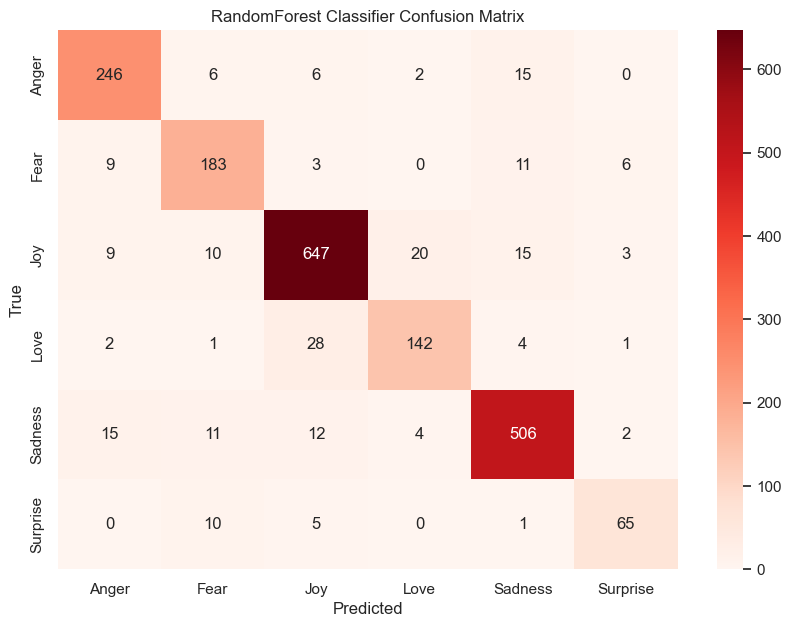

In [38]:
cm = confusion_matrix(val['sentiment'], pred_rfc)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()

#### EVALUATING THE MODEL WITH THE TEST DATASET

In [40]:
pred_rfc_test = pipeline_rfc.predict(test['text'])
print(classification_report(test['sentiment'],pred_rfc_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


              precision    recall  f1-score   support

       anger       0.88      0.93      0.90       275
        fear       0.87      0.85      0.86       224
         joy       0.90      0.91      0.91       695
        love       0.77      0.70      0.73       159
     sadness       0.93      0.93      0.93       581
    surprise       0.61      0.59      0.60        66

    accuracy                           0.89      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.88      0.89      0.88      2000



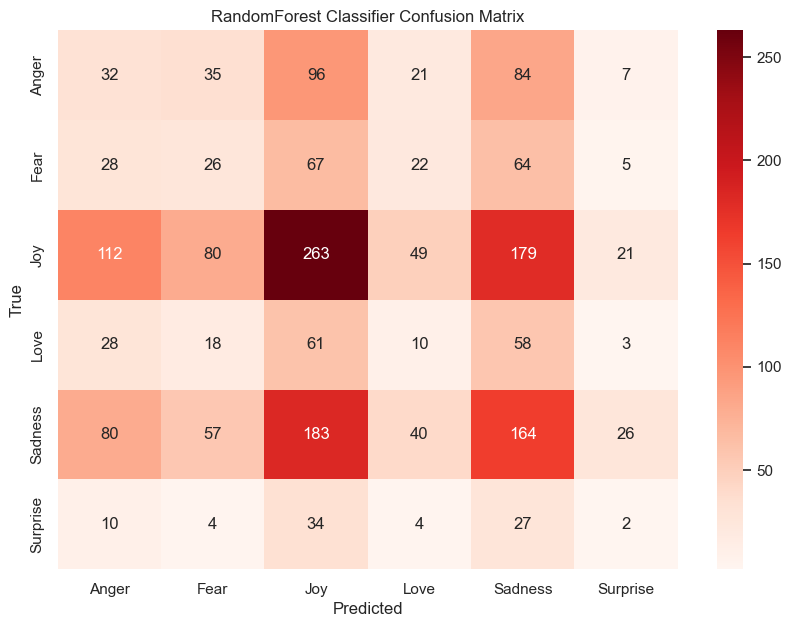

In [41]:
cm = confusion_matrix(val['sentiment'], pred_rfc_test)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()

## LOGISTIC REGRESSSION

In [43]:
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer(max_features=10000, ngram_range=(1, 1))),  
    ("model", LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data
pipeline_lr.fit(train['text'], train['sentiment'])

Pipeline(steps=[('text_processing', TextProcessor()),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('model', LogisticRegression(random_state=42))])

### EVALUATING THE MODEL WITH THE VALIDATION DATASET

In [45]:
pred_lr = pipeline_lr.predict(val['text'])
print(classification_report(val['sentiment'],pred_lr))

              precision    recall  f1-score   support

       anger       0.91      0.89      0.90       275
        fear       0.86      0.83      0.84       212
         joy       0.91      0.92      0.92       704
        love       0.82      0.80      0.81       178
     sadness       0.91      0.94      0.93       550
    surprise       0.79      0.74      0.76        81

    accuracy                           0.89      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.89      0.89      0.89      2000



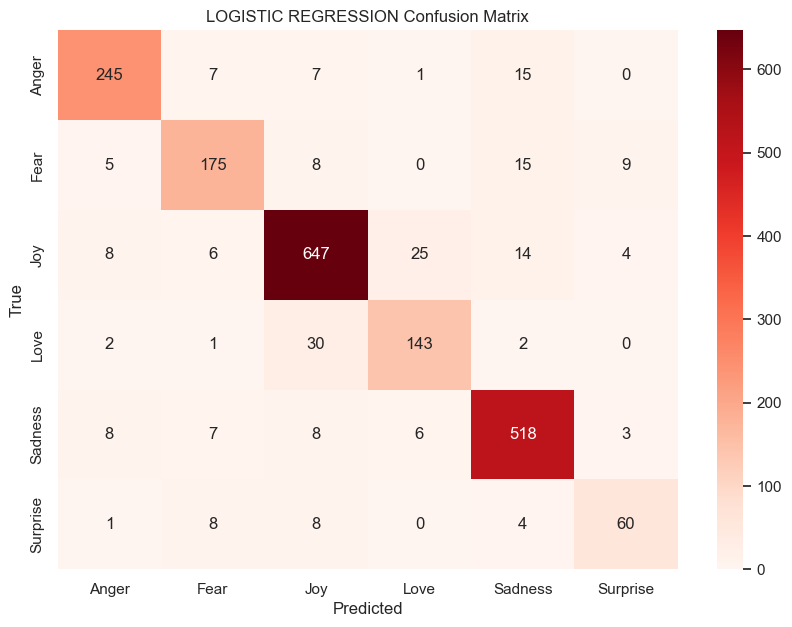

In [46]:
cm = confusion_matrix(val['sentiment'], pred_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LOGISTIC REGRESSION Confusion Matrix')
plt.show()

### EVALUATING THE MODEL WITH THE TEST DATASET

In [48]:
pred_lr_test = pipeline_lr.predict(test['text'])
print(classification_report(test['sentiment'],pred_lr_test))

              precision    recall  f1-score   support

       anger       0.88      0.87      0.87       275
        fear       0.85      0.84      0.84       224
         joy       0.91      0.93      0.92       695
        love       0.78      0.76      0.77       159
     sadness       0.93      0.94      0.93       581
    surprise       0.76      0.64      0.69        66

    accuracy                           0.89      2000
   macro avg       0.85      0.83      0.84      2000
weighted avg       0.89      0.89      0.89      2000



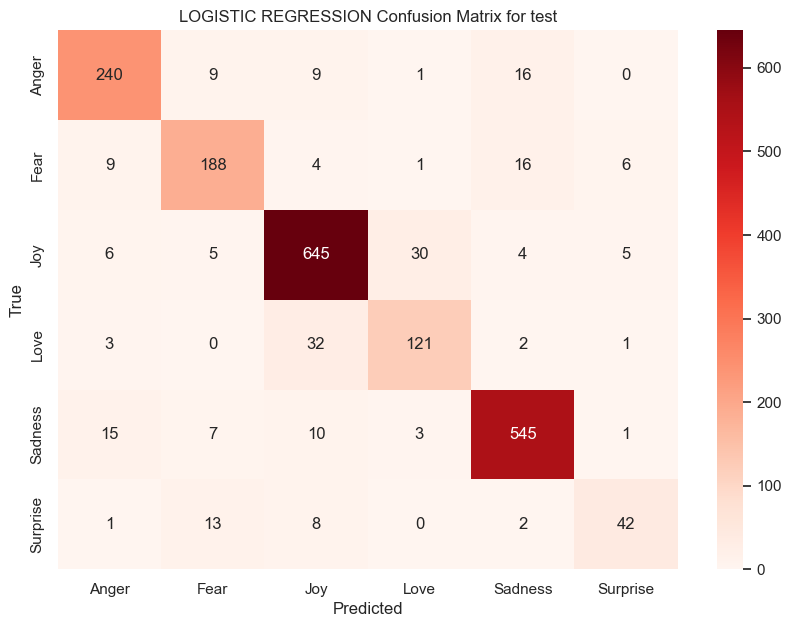

In [49]:
cm = confusion_matrix(test['sentiment'], pred_lr_test)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LOGISTIC REGRESSION Confusion Matrix for test')
plt.show()

### VOTING CLASSIFIER

In [52]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier


clf_1 = LogisticRegression(random_state=42) 
clf_2 = DecisionTreeClassifier(random_state=42) 
clf_3 = XGBClassifier() 
clf_4 = GaussianNB()
#clf_5 = RandomForestClassifier()  
clf_6 = lgb.LGBMClassifier()  
#clf_7 = CatBoostClassifier()    


# converting sparse output from the CountVectorizer to dense because Gaussian Nave Bayes AND LGBM model does not suppot sparse data input
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


pipeline_vt = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer(max_features=10000, ngram_range=(1, 1))),
    ("to_dense", to_dense),  
    ("model", VotingClassifier(estimators=[
        ('lr', clf_1), ('dt', clf_2), ('xgb',clf_3), ('nb', clf_4),
        #('rf', clf_5), 
        ('lgbm', clf_6)], 
        #('cat', clf_7)], 
        voting='soft'))
])


pipeline_vt.fit(train['text'], train['sentiment'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 1182
[LightGBM] [Info] Start training from score -2.002944
[LightGBM] [Info] Start training from score -2.111448
[LightGBM] [Info] Start training from score -1.093252
[LightGBM] [Info] Start training from score -2.507152
[LightGBM] [Info] Start training from score -1.232287
[LightGBM] [Info] Start training from score -3.331205


Pipeline(steps=[('text_processing', TextProcessor()),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001DFEAAD01F0>)),
                ('model',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42)),
                                              ('xgb',
                                               XGBClassifier(b...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                              ('nb', GaussianNB()),
                                              ('lgbm', LGBMClassifier())],
                                  voting='soft'))])

### EVALUATING THE MODEL WITH THE VALIDATION DATASET

In [54]:
pred_vt = pipeline_vt.predict(val['text'])
print(classification_report(val['sentiment'],pred_vt))

              precision    recall  f1-score   support

       anger       0.89      0.89      0.89       275
        fear       0.83      0.88      0.85       212
         joy       0.94      0.90      0.92       704
        love       0.81      0.84      0.82       178
     sadness       0.92      0.93      0.93       550
    surprise       0.83      0.83      0.83        81

    accuracy                           0.90      2000
   macro avg       0.87      0.88      0.87      2000
weighted avg       0.90      0.90      0.90      2000



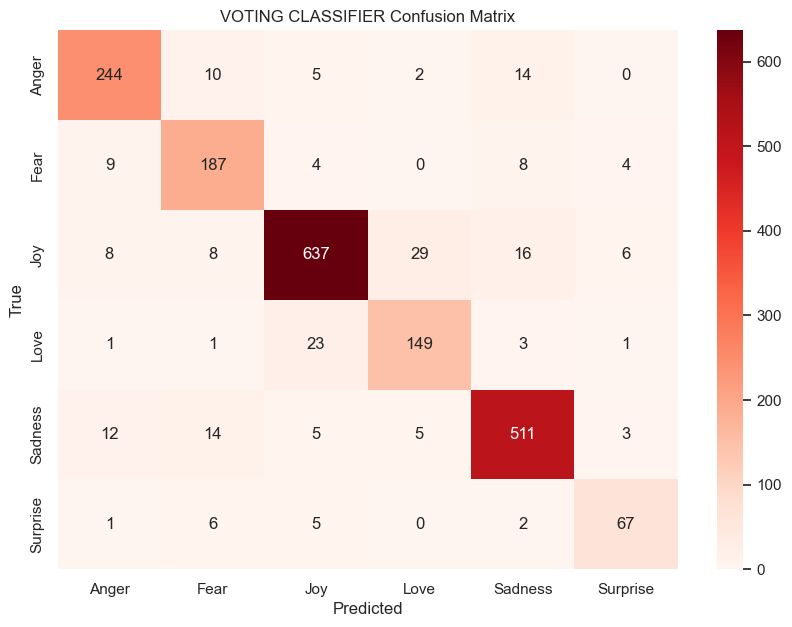

In [55]:
cm = confusion_matrix(val['sentiment'], pred_vt)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VOTING CLASSIFIER Confusion Matrix')
plt.show()

### EVALUATING THE MODEL WITH THE TEST DATASET

In [57]:
pred_vt_test = pipeline_vt.predict(test['text'])
print(classification_report(test['sentiment'],pred_vt_test))

              precision    recall  f1-score   support

       anger       0.89      0.92      0.90       275
        fear       0.87      0.86      0.86       224
         joy       0.93      0.91      0.92       695
        love       0.77      0.83      0.80       159
     sadness       0.93      0.92      0.93       581
    surprise       0.64      0.70      0.67        66

    accuracy                           0.89      2000
   macro avg       0.84      0.85      0.85      2000
weighted avg       0.90      0.89      0.89      2000



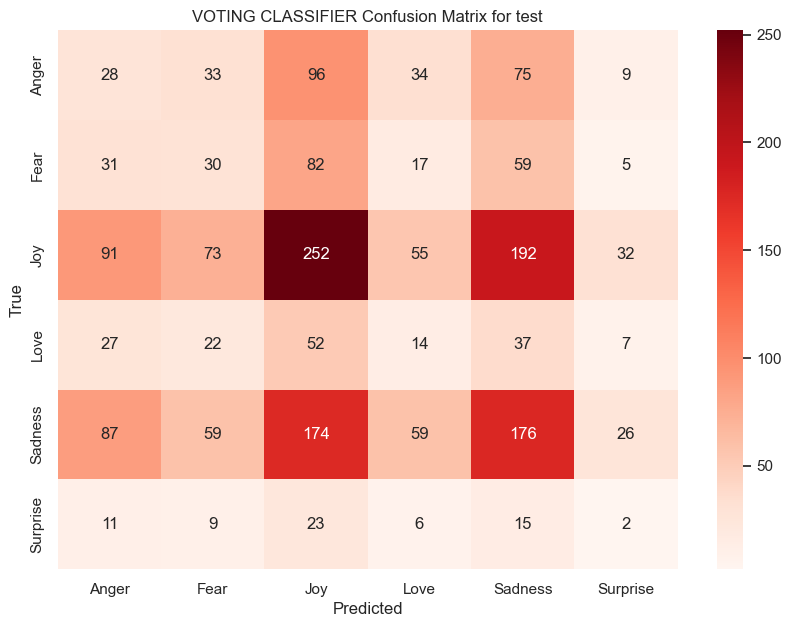

In [58]:
cm = confusion_matrix(test['sentiment'], pred_vt)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VOTING CLASSIFIER Confusion Matrix for test')
plt.show()

## LGBM

In [67]:
pipeline_lgbm = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer(max_features=10000, ngram_range=(1, 1))),
    ("to_float", FunctionTransformer(lambda x: x.astype('float32'), accept_sparse=True)),  # Convert to float
    ("model", lgb.LGBMClassifier())
])

# Fit the pipeline
pipeline_lgbm.fit(train['text'], train['sentiment'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.191663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 1182
[LightGBM] [Info] Start training from score -2.002944
[LightGBM] [Info] Start training from score -2.111448
[LightGBM] [Info] Start training from score -1.093252
[LightGBM] [Info] Start training from score -2.507152
[LightGBM] [Info] Start training from score -1.232287
[LightGBM] [Info] Start training from score -3.331205


Pipeline(steps=[('text_processing', TextProcessor()),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('to_float',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001DF9869D280>)),
                ('model', LGBMClassifier())])

### EVALUATING THE MODEL WITH THE VALIDATION DATASET

In [69]:
pred_lgbm = pipeline_lgbm.predict(val['text'])
print(classification_report(val['sentiment'],pred_lgbm))

              precision    recall  f1-score   support

       anger       0.88      0.83      0.86       275
        fear       0.81      0.83      0.82       212
         joy       0.89      0.91      0.90       704
        love       0.77      0.86      0.81       178
     sadness       0.94      0.91      0.92       550
    surprise       0.86      0.78      0.82        81

    accuracy                           0.88      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.88      0.88      0.88      2000



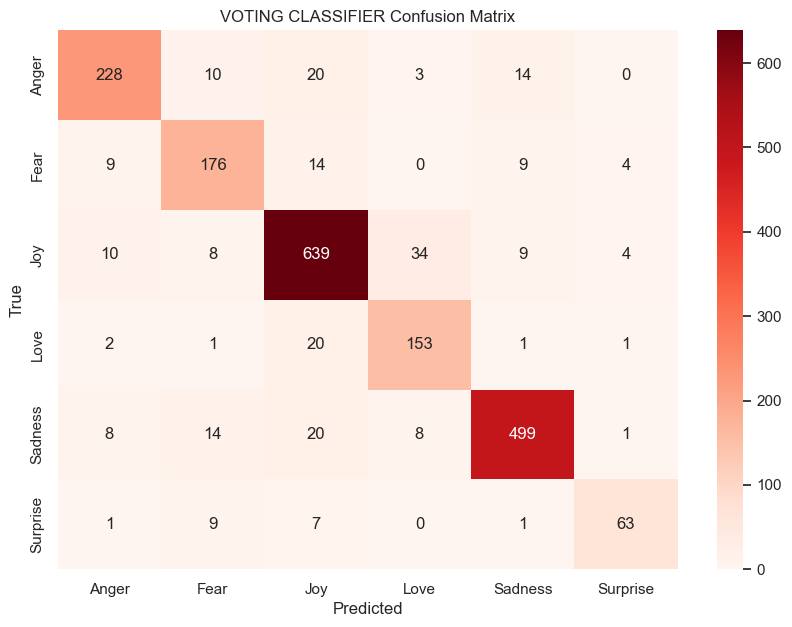

In [70]:
cm = confusion_matrix(val['sentiment'], pred_lgbm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VOTING CLASSIFIER Confusion Matrix')
plt.show()

### EVALUATING THE MODEL WITH THE TEST DATASET